# Procesamiento de infraestructura critica

## Importamos librerias

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os

## Zona limite

<AxesSubplot: >

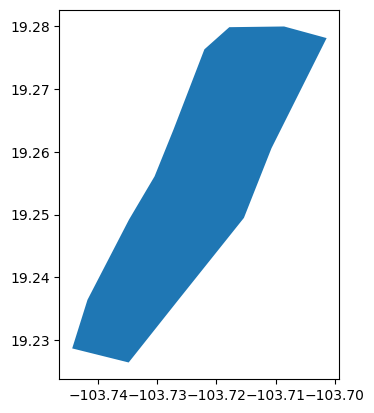

In [66]:
limite = gpd.read_file('qgis\zona_limite.gpkg')
limite.plot()

## Direcciones de archivos DENUE

In [39]:
denue_files = glob.glob("data/denue/*/*.shp")
denue_files[:5]

['data/denue\\10_denue_06_2013_shp\\DENUE_Nacional_06.shp',
 'data/denue\\12_denue_06_25022015_shp\\DENUE_INEGI_06_.shp',
 'data/denue\\2_denue_06_2010_shp\\DENUE Colima.shp',
 'data/denue\\4_denue_06_2011_shp\\denue1106c_06.shp',
 'data/denue\\6_denue_06_2012_shp\\denue_1_06.shp']

In [96]:
denue_files2 = glob.glob("data/denue/*/conjunto_de_datos/*.shp")
denue_files2

['data/denue\\20_denue_06_1117_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\22_denue_06_0318_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\24_denue_06_1118_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\26_denue_06_0419_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\28_denue_06_1119_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\30_denue_06_0420_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\32_denue_06_1120_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\34_denue_06_0521_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\36_denue_06_1121_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\38_denue_06_0522_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\40_denue_06_shp\\conjunto_de_datos\\denue_inegi_06_.shp']

In [97]:
denue_files = denue_files + denue_files2

In [95]:
len(denue_files)

6

In [98]:
df_full = gpd.GeoDataFrame()
for f in denue_files:
  gdf = gpd.read_file(f)
  
  # columns to lowercase
  gdf.columns = [x.lower() for x in gdf.columns]
  limite.crs = gdf.crs
  
  gdf = gpd.sjoin(gdf, limite, how="inner", op='intersects')
  if gdf.shape[0] == 0:
    print(f)
    continue
  #gdf = gdf[gdf['cve_mun'].isin(["010", "002"])]
  try:
    gdf = gdf[gdf['desc_act'].str.contains("Escuela|Farmacia|Hospital")]
  except:
    gdf = gdf[gdf['nombre_act'].str.contains("Escuela|Farmacia|Hospital")]
    
  
  print(gdf.shape)
  df_full = pd.concat([df_full, gdf], axis=0)
  
df_full

C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(174, 46)


C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(203, 43)


C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


data/denue\2_denue_06_2010_shp\DENUE Colima.shp


C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


data/denue\4_denue_06_2011_shp\denue1106c_06.shp


C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(0, 49)


C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(174, 30)


C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(193, 43)


C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(192, 43)


C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(192, 43)


C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(193, 43)


C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(194, 43)


C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(203, 43)


C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(206, 43)


C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(189, 44)


C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(185, 44)


C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(185, 44)
(189, 44)


C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,d_llave,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ageb,manzana,nom_estab,...,nomb_asent,tipocencom,nom_cencom,telefono,tipounieco,fecha_alta,nic,nop,tipo_ue,clee
362,3513760.0,06,COLIMA,002,COLIMA,0001,Colima,0746,028,FARMACIA DE LA CRUZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,2574899.0,06,COLIMA,002,COLIMA,0001,Colima,1458,016,FARMACIA GENERICOS MI SALUD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581,4185355.0,06,COLIMA,002,COLIMA,0001,Colima,0746,034,FARMACIA GUADALUPANA DE COLIMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980,4186049.0,06,COLIMA,002,COLIMA,0001,Colima,0746,028,FARMACIAS GUADALAJARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,2935124.0,06,COLIMA,002,COLIMA,0001,Colima,0746,022,FARMACIA ZAPOTLAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29921,NaN,06,Colima,002,Colima,0001,Colima,1528,019,ESCUELA JOSE S BENITEZ ESPINOSA TURNO VESPERTINO,...,LA ALBARRADA,None,None,3123132836,Fijo,2010-07,NaN,NaN,NaN,06002611122000713000000000U1
29940,NaN,06,Colima,002,Colima,0001,Colima,1528,019,ESCUELA JOSE S BENITEZ ESPINOZATURNO MATUTINO,...,LA ALBARRADA,None,None,3123132836,Fijo,2010-07,NaN,NaN,NaN,06002611122000132000000000U4
29959,NaN,06,Colima,002,Colima,0001,Colima,1227,037,ESCUELA DE NATACION AQUA,...,RESIDENCIAL ESMERALDA NORTE,None,None,None,Fijo,2019-11,NaN,NaN,NaN,06002611621000282000000000U8
29965,NaN,06,Colima,002,Colima,0001,Colima,0746,018,ESCUELA DE MUSICA STACCATO,...,CENTRO,None,None,None,Fijo,2019-11,NaN,NaN,NaN,06002611611000142000000000U5


In [99]:
df_full.to_file("data/denue_2023.gpkg", driver="GPKG")